In [1]:
import csv
import sys
import time

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml

%matplotlib inline
from IPython.display import set_matplotlib_formats

from iplhelpers import iplclasses
from iplhelpers import yamlutils as yu
from iplhelpers import ziputils as zp

In [2]:
pd.set_option("display.max_rows", 10000)
pd.set_option("display.max_columns", 20)
pd.set_option("display.width", None)

set_matplotlib_formats("png", "pdf")
plt.style.use("seaborn-darkgrid")#fivethirtyeight,ggplot,seaborn-darkgrid,seaborn-whitegrid
plt.rcParams["figure.figsize"] = [22, 8]

In [3]:
yamlIn = open("335982.yaml", "r")
yamlFile = yaml.load(yamlIn, Loader=yaml.FullLoader)
tempDf = yu.readYamlToDataFrame(1, yamlFile)
tempDf.head()

,MatchId,Date,City,Team1,Team2,TossWinner,TossDecision,ManOfTheMatch,Winner,WonByRuns,...,BattingTeam,Opener1,Opener2,BallNo,Batsman,Bowler,NonStriker,RunsBat,RunsExtras,TotalRuns
0,1,2008-04-18,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,BB McCullum,Kolkata Knight Riders,140,...,Kolkata Knight Riders,SC Ganguly,BB McCullum,0.1,SC Ganguly,P Kumar,BB McCullum,0,1,1
1,1,2008-04-18,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,BB McCullum,Kolkata Knight Riders,140,...,Kolkata Knight Riders,SC Ganguly,BB McCullum,0.2,BB McCullum,P Kumar,SC Ganguly,0,0,0
2,1,2008-04-18,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,BB McCullum,Kolkata Knight Riders,140,...,Kolkata Knight Riders,SC Ganguly,BB McCullum,0.3,BB McCullum,P Kumar,SC Ganguly,0,1,1
3,1,2008-04-18,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,BB McCullum,Kolkata Knight Riders,140,...,Kolkata Knight Riders,SC Ganguly,BB McCullum,0.4,BB McCullum,P Kumar,SC Ganguly,0,0,0
4,1,2008-04-18,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,BB McCullum,Kolkata Knight Riders,140,...,Kolkata Knight Riders,SC Ganguly,BB McCullum,0.5,BB McCullum,P Kumar,SC Ganguly,0,0,0


In [4]:
# df = zp.extractZipAndProcess("ipl.zip")
# df.to_csv("all-records.csv", index=False)
df = pd.read_csv("all-records.csv")

In [5]:
df.tail()
# df.to_csv('all-records.csv', index=False)
df.shape

(178958, 22)

In [6]:
# added Column Season with Year of match
df["Season"] = pd.DatetimeIndex(df["Date"]).year
# replace Bangalore with Bengaluru
df.City.replace("Bangalore", "Bengaluru", inplace=True)
df.ManOfTheMatch.fillna("-", inplace=True)

In [7]:
# df["City"] = df["City"].astype("category")
# df["Team1"] = df["Team1"].astype("category")
# df["Team2"] = df["Team2"].astype("category")
# df["TossWinner"] = df["TossWinner"].astype("category")
# df["TossDecision"] = df["TossDecision"].astype("category")
# df["ManOfTheMatch"] = df["ManOfTheMatch"].astype("category")
# df["Winner"] = df["Winner"].astype("category")
# df["InningNo"] = df["InningNo"].astype("category")
# df["BattingTeam"] = df["BattingTeam"].astype("category")
# df["Opener1"] = df["Opener1"].astype("category")
# df["Opener2"] = df["Opener2"].astype("category")
# df["Batsman"] = df["Batsman"].astype("category")
# df["NonStriker"] = df["NonStriker"].astype("category")

### Create DataFrame only for Match Information

In [8]:
matchinfo = df.groupby(by=["MatchId"])
dfMatchInfo = matchinfo.head(n=1)
dfMatchInfo.shape

(756, 23)

### Histogram for matches per Season

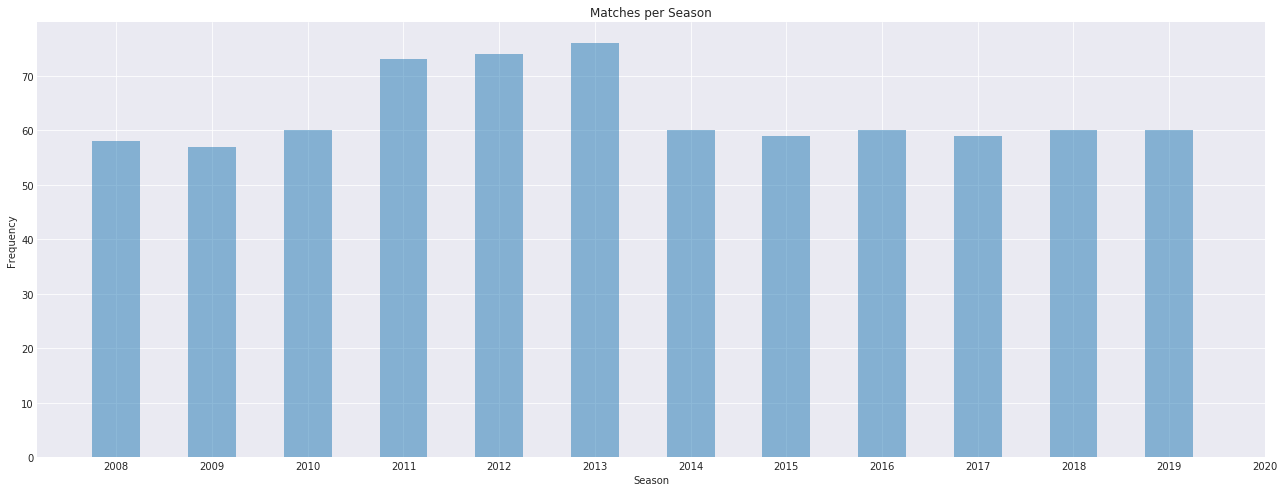

In [9]:
bins = list(range(2008, 2021))
plt.title("Matches per Season")
plt.hist(
    dfMatchInfo.Season, bins=bins,alpha=0.5, align="left", rwidth=0.5
)
plt.xlabel("Season")
plt.ylabel("Frequency")
plt.xticks(ticks=bins)
plt.show()

### Histogram for Match location

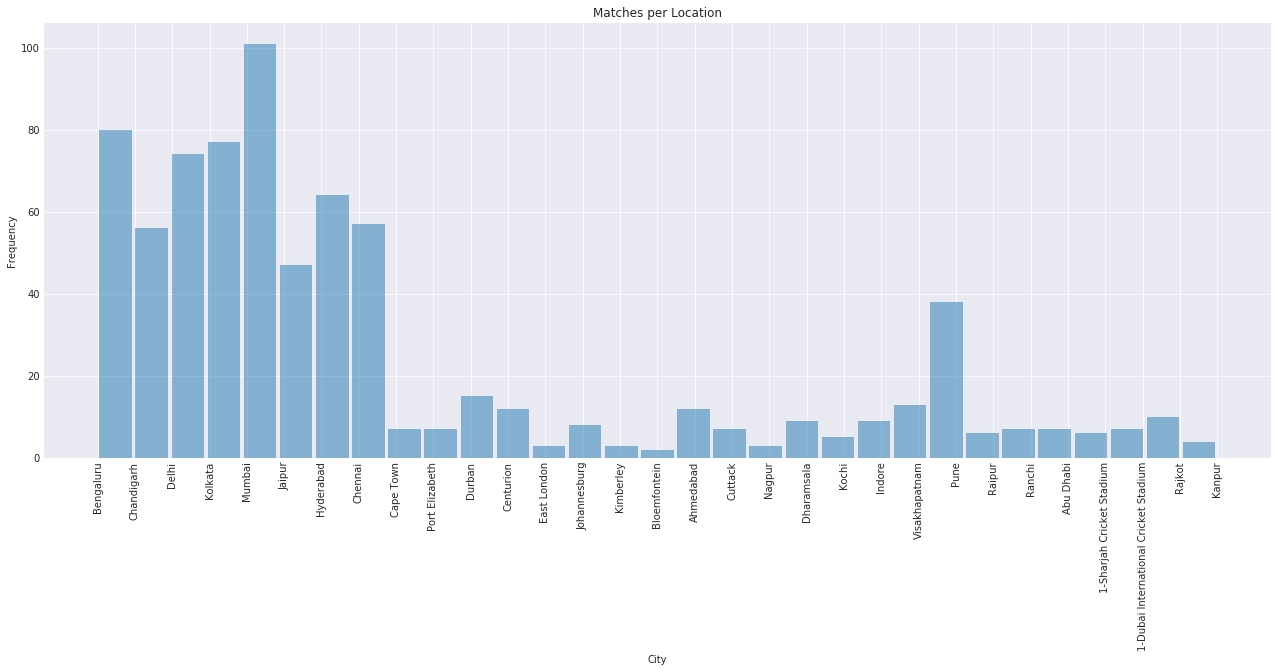

In [10]:
cities = len(dfMatchInfo.City.unique())
plt.title("Matches per Location")
plt.hist(
    dfMatchInfo.City, bins=cities,  alpha=0.5, align="mid", rwidth=0.9
)
plt.xlabel("City")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.show()

### Histogram for Toss winners

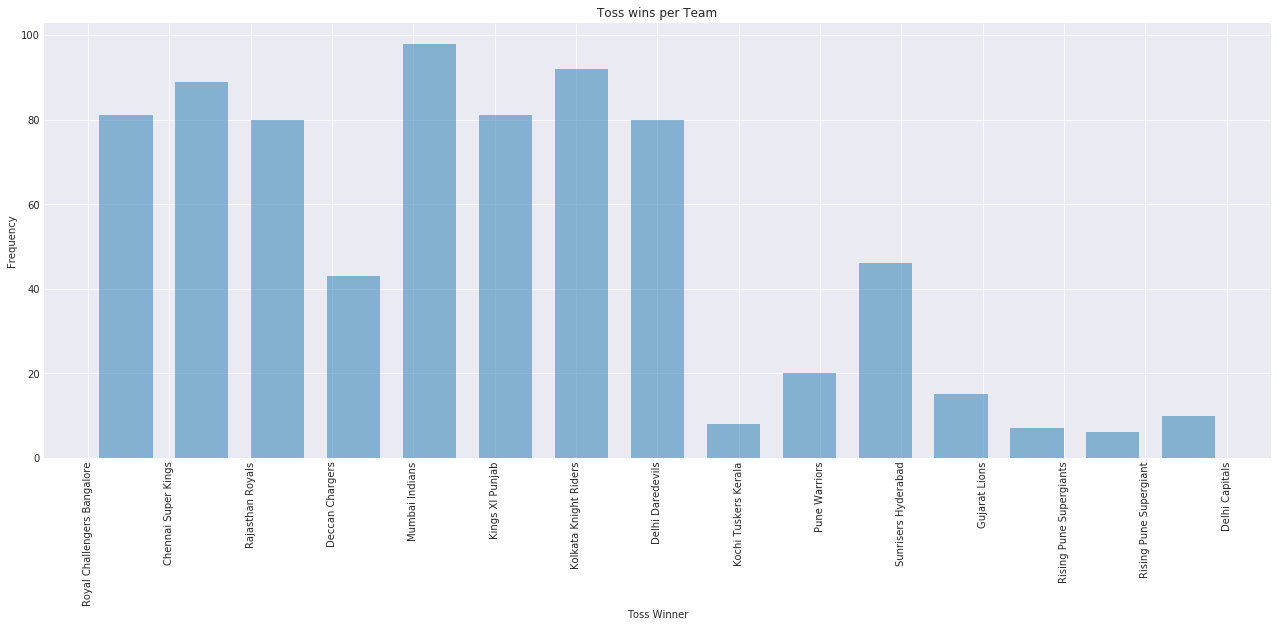

In [11]:
bins = len(dfMatchInfo.TossWinner.unique())
plt.title("Toss wins per Team")
plt.hist(
    dfMatchInfo.TossWinner,
    bins=bins,
    
    alpha=0.5,
    align="mid",
    rwidth=0.7,
)
plt.xlabel("Toss Winner")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.show()

### Histogram for Match Winners

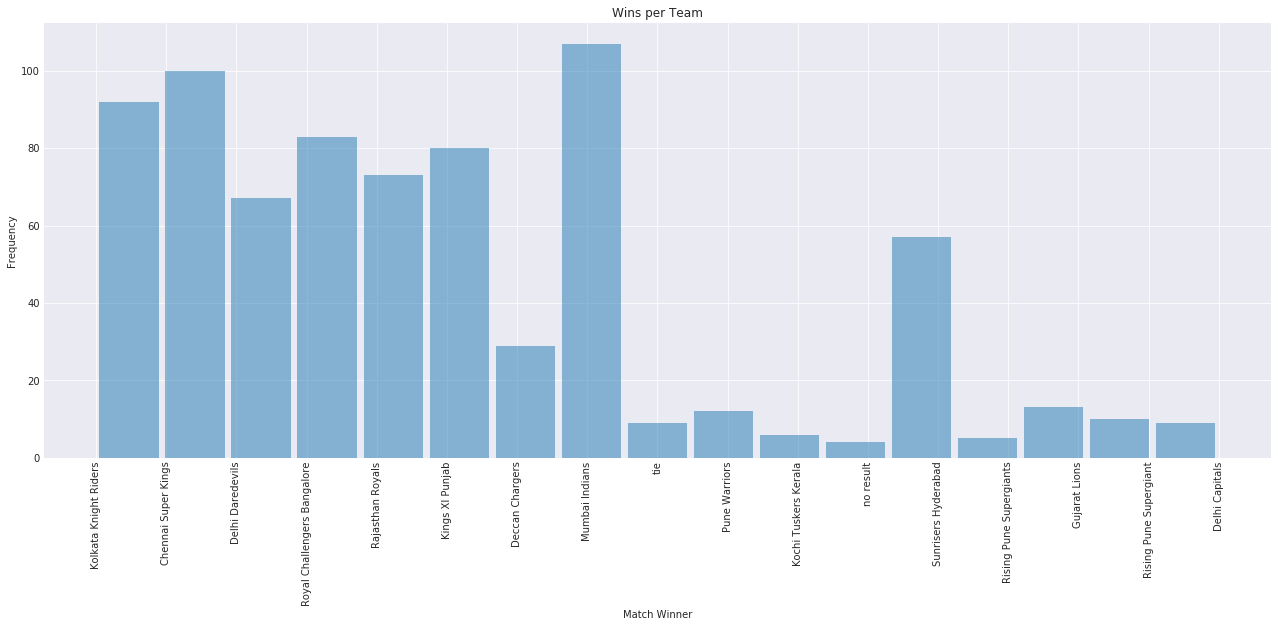

In [12]:
bins = len(dfMatchInfo.Winner.unique())
plt.title("Wins per Team")
plt.hist(dfMatchInfo.Winner, bins=bins,  alpha=0.5, rwidth=0.9)
plt.xlabel("Match Winner",)
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.show()

In [13]:
groupByInnings = df.groupby(by=["MatchId", "InningNo"])
teamsTotalRuns = groupByInnings["TotalRuns"].sum()

### Create Dataframe for Batsman

In [14]:
df_batsman = df
df_batsman["Fours"] = df_batsman["RunsBat"] == 4
df_batsman["Sixes"] = df_batsman["RunsBat"] == 6
df_batsman = df.groupby(by=["MatchId", "InningNo", "Batsman"])
runsByBatsmanPermatch = df_batsman.agg({"RunsBat": "sum", "BallNo": "count"})

### Create Datafram for Each Inning

In [15]:
inningsInfo = groupByInnings.head(n=1)
print(inningsInfo.shape)
d = {"runsOpener1": [], "runsOpener2": []}
runsForOpener = pd.DataFrame(data=d)
for index, row in inningsInfo.iterrows():
    try:
        opener1Runs = runsByBatsmanPermatch.loc[
            row["MatchId"], row["InningNo"], row["Opener1"]
        ]["RunsBat"]
        opener2Runs = runsByBatsmanPermatch.loc[
            row["MatchId"], row["InningNo"], row["Opener2"]
        ]["RunsBat"]

    except KeyError:
        opener1Runs = 0
        opener2Runs = 0

    try:
        teamToal = teamsTotalRuns.loc[row["MatchId"], row["InningNo"]]
    except KeyError:
        teamToal = 0

    if row["BattingTeam"] == row["Team1"]:
        opposition = row["Team2"]
    else:
        opposition = row["Team1"]

    d = {
        "runsOpener1": [opener1Runs],
        "runsOpener2": [opener2Runs],
        "teamTotalRuns": [teamToal],
        "opposition": [opposition],
    }
    runsForOpenerTemp = pd.DataFrame(data=d)
    runsForOpener = pd.concat([runsForOpener, runsForOpenerTemp], ignore_index=True)

inningsInfo.reset_index(inplace=True)

inningsInfo = pd.concat([inningsInfo, runsForOpener], axis=1)
inningsInfo.reset_index(inplace=True)
# inningsInfo.join(runsForOpener)


# inningsInfo.shape

(1510, 25)


In [16]:
inningsInfo["Won"] = inningsInfo["Winner"] == inningsInfo["BattingTeam"]
inningsInfo["Chasing"] = inningsInfo["InningNo"] % 2 == 0
inningsInfo["WonToss"] = inningsInfo["TossWinner"] == inningsInfo["BattingTeam"]

inningsInfo.head(10)

,level_0,index,MatchId,Date,City,Team1,Team2,TossWinner,TossDecision,ManOfTheMatch,...,Season,Fours,Sixes,runsOpener1,runsOpener2,teamTotalRuns,opposition,Won,Chasing,WonToss
0,0,0,1,2008-04-18,Bengaluru,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,BB McCullum,...,2008,False,False,10.0,158.0,222.0,Royal Challengers Bangalore,True,False,False
1,1,124,1,2008-04-18,Bengaluru,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,BB McCullum,...,2008,False,False,2.0,6.0,82.0,Kolkata Knight Riders,False,True,True
2,2,225,2,2008-04-19,Chandigarh,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,MEK Hussey,...,2008,False,False,15.0,25.0,240.0,Kings XI Punjab,True,False,True
3,3,349,2,2008-04-19,Chandigarh,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,MEK Hussey,...,2008,True,False,24.0,71.0,207.0,Chennai Super Kings,False,True,False
4,4,473,3,2008-04-19,Delhi,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,MF Maharoof,...,2008,False,False,7.0,10.0,129.0,Delhi Daredevils,False,False,True
5,5,595,3,2008-04-19,Delhi,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,MF Maharoof,...,2008,False,False,58.0,12.0,132.0,Rajasthan Royals,True,True,False
6,6,692,4,2008-04-20,Kolkata,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,DJ Hussey,...,2008,False,False,23.0,14.0,110.0,Kolkata Knight Riders,False,False,True
7,7,810,4,2008-04-20,Kolkata,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,DJ Hussey,...,2008,False,False,10.0,5.0,112.0,Deccan Chargers,True,True,False
8,8,932,5,2008-04-20,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,MV Boucher,...,2008,False,False,8.0,29.0,165.0,Royal Challengers Bangalore,False,False,True
9,9,1055,5,2008-04-20,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,MV Boucher,...,2008,False,False,16.0,32.0,166.0,Mumbai Indians,True,True,False


### Add information to batsman Dataframe

In [17]:
batsmanPerMatch = pd.DataFrame()
for index in runsByBatsmanPermatch.index:
    inning = inningsInfo.loc[
        (inningsInfo["MatchId"] == index[0]) & (inningsInfo["InningNo"] == index[1])
    ]
    batsmanTotal = runsByBatsmanPermatch.loc[index[0], index[1], index[2]]
    batsmanRun = batsmanTotal["RunsBat"]
    balls = batsmanTotal["BallNo"]
    d = {
        "MatchId": inning["MatchId"],
        "InningNo": inning["InningNo"],
        "Team": inning["BattingTeam"],
        "Batsman": [index[2]],
        "TotalRuns": [batsmanRun],
        "Opposition": inning["opposition"],
        "ManOfTheMatch": inning["ManOfTheMatch"] == index[2],
        "Season": inning["Season"],
        "TeamTotalRuns": inning["teamTotalRuns"],
        "City": inning["City"],
        "Won": inning["Won"],
        "Chasing": inning["Chasing"],
        "Century": [batsmanRun > 99],
        "HalfCentury": [(batsmanRun > 49) & (batsmanRun < 100)],
        "Balls": [balls],
    }
    dfTemp = pd.DataFrame(data=d)
    batsmanPerMatch = pd.concat([batsmanPerMatch, dfTemp], ignore_index=True)
batsmanPerMatch["StrikeRate"] = (
    100 * batsmanPerMatch["TotalRuns"] / batsmanPerMatch["Balls"]
)

In [18]:
batsmanPerSeason = batsmanPerMatch.groupby(by=["Batsman", "Season"]).agg(
    {
        "TotalRuns": "sum",
        "ManOfTheMatch": "sum",
        "TeamTotalRuns": "sum",
        "Won": "sum",
        "InningNo": "count",
        "Century": "sum",
        "HalfCentury": "sum",
        "Balls": "sum",
    }
)
batsmanPerSeason["StrikeRate"] = (
    100 * batsmanPerSeason["TotalRuns"] / batsmanPerSeason["Balls"]
)
batsmanAllSeason = batsmanPerMatch.groupby(by=["Batsman"]).agg(
    {
        "TotalRuns": "sum",
        "ManOfTheMatch": "sum",
        "TeamTotalRuns": "sum",
        "Won": "sum",
        "InningNo": "count",
        "Century": "sum",
        "HalfCentury": "sum",
        "Balls": "sum",
    }
)
batsmanAllSeason["StrikeRate"] = (
    100 * batsmanAllSeason["TotalRuns"] / batsmanAllSeason["Balls"]
)

### Histogram for Man of Match

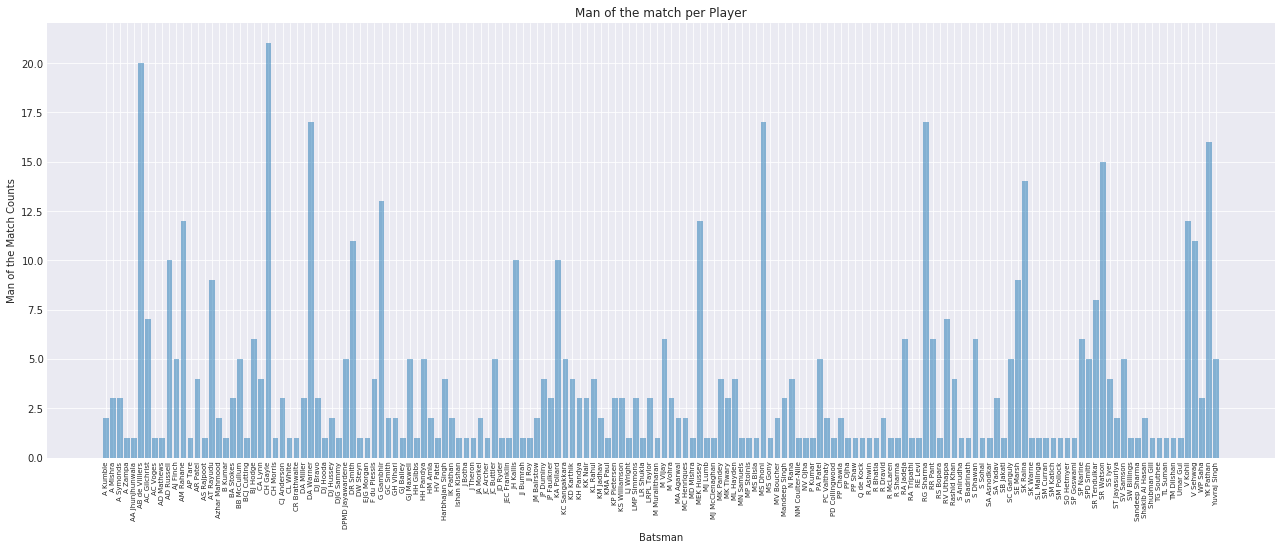

In [19]:
moms = batsmanAllSeason[batsmanAllSeason["ManOfTheMatch"] > 0]
bins = len(moms)
plt.title("Man of the match per Player")
plt.bar(x=moms.index, height=moms["ManOfTheMatch"],  alpha=0.5)
plt.xlabel("Batsman",)
plt.xticks(rotation=90, fontsize=7)
plt.ylabel("Man of the Match Counts")
plt.show()

### Histogram for number of centuries 

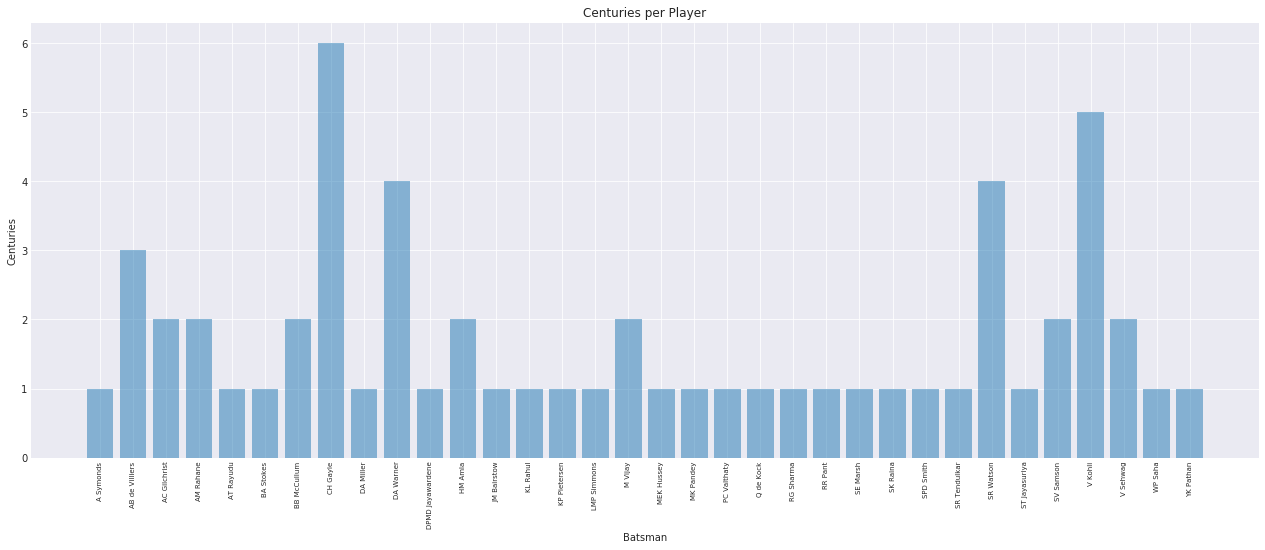

In [20]:
centuries = batsmanAllSeason[batsmanAllSeason["Century"] > 0]
bins = len(centuries)
plt.title("Centuries per Player")
plt.bar(x=centuries.index, height=centuries["Century"],  alpha=0.5)
plt.xlabel("Batsman",)
plt.xticks(rotation=90, fontsize=7)
plt.ylabel("Centuries")
plt.show()

### Histogram for Batsmen with half-centuries

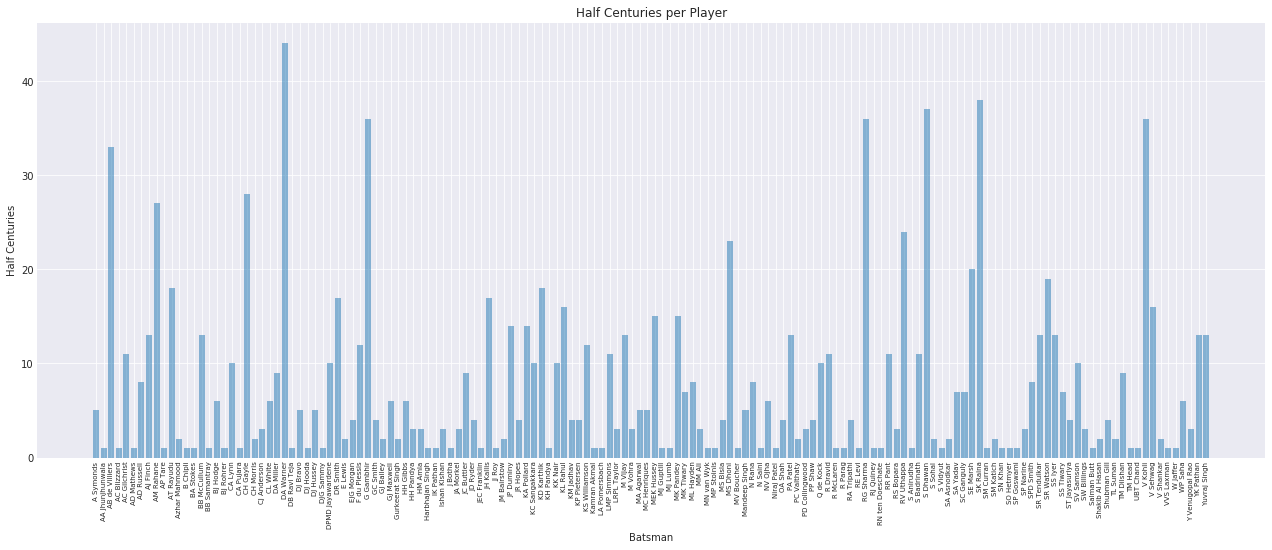

In [21]:
halfCenturies = batsmanAllSeason[batsmanAllSeason["HalfCentury"] > 0]
bins = len(halfCenturies)
plt.title("Half Centuries per Player")
plt.bar(
    x=halfCenturies.index,
    height=halfCenturies["HalfCentury"],
    
    alpha=0.5,
)
plt.xlabel("Batsman",)
plt.xticks(rotation=90, fontsize=7)
plt.ylabel("Half Centuries")
plt.show()

### Histogram for Strike Rates with > 50 and total runs > 300

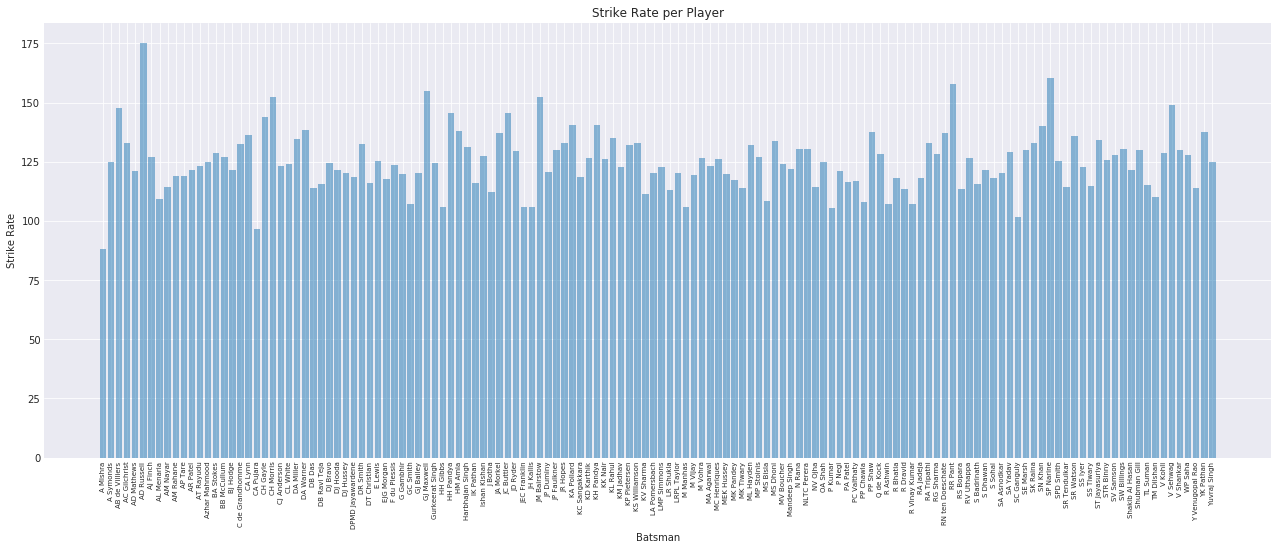

In [22]:

strkRate = batsmanAllSeason[
    (batsmanAllSeason["StrikeRate"] > 80) & (batsmanAllSeason["TotalRuns"] > 300)
]
bins = len(strkRate)
plt.title("Strike Rate per Player")
plt.bar(
    x=strkRate.index, height=strkRate["StrikeRate"],  alpha=0.5,
)

plt.xlabel("Batsman",)
plt.xticks(rotation=90, fontsize=7)
plt.ylabel("Strike Rate")
plt.show()

In [23]:
plt.style.available

['seaborn-paper',
 'seaborn-ticks',
 'classic',
 'fivethirtyeight',
 'seaborn-notebook',
 'dark_background',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-whitegrid',
 'seaborn-white',
 'seaborn-bright',
 'seaborn-poster',
 'seaborn-pastel',
 'seaborn-muted',
 'bmh',
 'tableau-colorblind10',
 'seaborn-dark',
 'seaborn-deep',
 '_classic_test',
 'seaborn-talk',
 'seaborn-dark-palette',
 'fast',
 'seaborn-darkgrid',
 'seaborn',
 'Solarize_Light2',
 'grayscale']